In [2]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests
import time
import json
import matplotlib.pyplot as plt

In [4]:
#firstly we sending 100 request to unreliable banking
url = "https://latest-960957615762.me-central1.run.app/getbalance"
print("100 requests to the banking API...")

for i in range(100):
    try:
        response = requests.get(url, timeout=5)
        print(f"{i+1}. Status: {response.status_code}, Response: {response.text[:50]}")
    except Exception as e:
        print(f"{i+1}. Error: {e}")
    time.sleep(0.5)

print("Done with requests.\n")

100 requests to the banking API...
1. Status: 500, Response: ERROR Internal Server error

2. Status: 500, Response: ERROR Internal Server error

3. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
4. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
5. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
6. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
7. Status: 500, Response: ERROR Internal Server error

8. Status: 500, Response: ERROR Internal Server error

9. Status: 500, Response: ERROR Internal Server error

10. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
11. Status: 500, Response: ERROR Internal Server error

12. Status: 500, Response: ERROR Internal Server error

13. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
14. Status: 200, Response: <html>
<head>
    <meta name="viewport" content="w
15. Status: 200, Response: <html>
<h

In [5]:
#now we get the logs and save to them in banklogs.txt
log_url = "https://latest-960957615762.me-central1.run.app/getlogs"
print("Downloading logs from the server...")
log_response = requests.get(log_url)
logs_text = log_response.text

with open("banklogs.txt", "w", encoding="utf-8") as file:
    file.write(logs_text)
print("Logs saved as banklogs.txt\n")


Logs saved as banklogs.txt



In [ ]:
#and now we try to understand the rate of success, errors and warnings. so we should analyze the rates
try:
    logs = json.loads(logs_text)
except:
    logs = logs_text.splitlines()
success = 0
error = 0
warning = 0

for entry in logs:
    entry = str(entry).lower()
    if "error" in entry:
        error += 1
    elif "warning" in entry:
        warning += 1
    else:
        success += 1

total = success + error + warning
reliability = (success / total) * 100 if total > 0 else 0

print("results:")
print(f"  Total entries: {total}")
print(f"  Success: {success}")
print(f"  Warning: {warning}")
print(f"  Error: {error}")
print(f"  Reliability: {reliability:.2f}%\n")

results:
  Total entries: 327
  Success: 191
  Error: 98
  Reliability: 58.41%



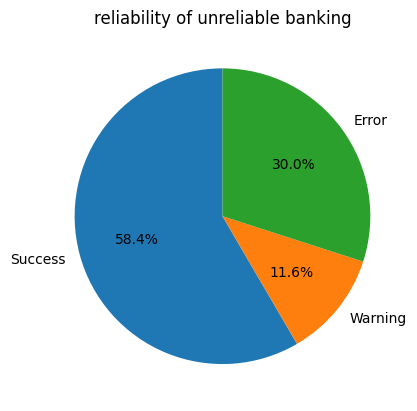

In [15]:
#and now lets visualize the results 

plt.pie(
    [success, warning, error],
    labels=["Success", "Warning", "Error"],
    autopct="%1.1f%%",
    startangle=90,
    explode=(0, 0, 0) 
)
plt.title("reliability of unreliable banking")
plt.savefig("religraph.png")
plt.show()
